# Random numbers basics

**Table of contents**<a id='toc0_'></a>    
- 1. [Random numbers and simulation](#toc1_)    
- 2. [Random numbers](#toc3_)    
  - 2.1. [Numpy](#toc3_1_)    
  - 2.2. [Different distributions](#toc3_2_)    
  - 2.3. [Analytical results](#toc3_3_)    
- 3. [Load and save variables](#toc4_)    
  - 3.1. [Pickle](#toc4_1_)    
  - 3.2. [Saving with numpy](#toc4_2_)    
- 4. [Create a class to generate random numbers](#toc5_)    
- 5. [Applications](#toc6_)    
  - 5.1. [AR(1)-process](#toc6_1_)    
  - 5.2. [Monte Carlo](#toc6_2_) 
<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Set up](#toc0_)

You will learn how to use a random number generator with a seed and produce simulation results (**numpy.random**, **scipy.stats**), and calcuate the expected value of a random variable through Monte Carlo integration. You will learn how to save your results for later use (**pickle**).

**Links:**

* [numpy.random](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html)
* [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
* datacamp on [pickle](https://www.datacamp.com/community/tutorials/pickle-python-tutorial)

**Imports:** We now import all the modules, we need for this notebook. Importing everything in the beginning makes it more clear what modules the notebook relies on.

In [44]:
import pickle
import numpy as np

from scipy.stats import norm # normal distribution

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

## 2. <a id='toc3_'></a>[Random numbers](#toc0_)

The two main approaches to generating random numbers are:

1. **Physical observations** of random processes (radioactive decay,  atmospheric noise, roulette wheels, etc.)
2. **Algorithms** creating **pseudo-random numbers**. Numbers that are *determined* by the algo but **appear** random.

**Pseudo-random numbers** satisfy properties such that they are as good as random. It should be impossible (for all practical purposes) to calculate, or otherwise guess, from any given subsequence, any previous or future values in the sequence.

**More information:** See this [video](https://www.youtube.com/watch?v=C82JyCmtKWg&app=desktop#fauxfullscreen) by Infinite Series.

### 2.1. <a id='toc3_1_'></a>[Numpy](#toc0_)
[Back to TOC](#top)



Numpy provides various functions for **drawing** random numbers. We can, for example, draw random integers between 0 and 10000:

In [45]:
X = np.random.randint(0,10000,size=5)
print(X) # the result is a 1D array of 5 random integers between 0 and 10000

[9830 4833 9148  120  416]


**Problem:** How can we reproduce our results the next time we open Python?

**Solution:** Use a **seed**. This will fix the algorithm to give the same set numbers each time.     
Choose the seed, and reset the random number generator:

### 2.1. <a id='toc3_1_'></a>[Seeding Random Numbers in NumPy](#toc0_)

There are **two common ways** to set seeds in NumPy:

1) Create a *local* random number generator  
   `rng = np.random.default_rng(seed)` and then draw with `rng.normal(...)`, `rng.random(...)`, etc.

2) Set the seed globally: the *module-level* seed  
   `np.random.seed(seed)` and then draw with `np.random.normal(...)`, `np.random.random(...)`, etc.

**Recommendation: use the modern local RNG**
- Create a local generator: `rng = np.random.default_rng(seed)`.
- Pass `rng` into functions (no hidden global state).
- Avoid global seeding (`np.random.seed(...)`) to keep simulations **reproducible** and **testable**.



In [46]:
# Draw random integers between 0 and 10000 using default_rng
rng = np.random.default_rng(42)
print("Five uniforms                 :", rng.random(5))

rng2 = np.random.default_rng(42)
print("Five uniforms (same seed)     :", rng2.random(5))

rng2 = np.random.default_rng(7)
print("Five uniforms (different seed):", rng2.random(5))


Five uniforms                 : [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735]
Five uniforms (same seed)     : [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735]
Five uniforms (different seed): [0.62509547 0.8972138  0.77568569 0.22520719 0.30016628]


In [47]:
# Draw random integers between 0 and 10000 using global state

print("set seed to 2000 and create numbers:")
np.random.seed(2000)
print(np.random.uniform(size=5))

print("reset algorithm by stating the same seed again:")
np.random.seed(2000)
print(np.random.uniform(size=5))

set seed to 2000 and create numbers:
[0.57051729 0.56452876 0.48844183 0.33647775 0.37586818]
reset algorithm by stating the same seed again:
[0.57051729 0.56452876 0.48844183 0.33647775 0.37586818]


In [48]:
# Same seed, same draws (baseline)
np.random.seed(2024)
a1 = np.random.normal(size=5)

# Re-seed with the SAME seed, but do an unrelated draw in between
np.random.seed(2024)
_ = np.random.random(size=10_000)   # unrelated code changes the GLOBAL stream
a2 = np.random.normal(size=5)

print("Global: same seed, no interference           ->", a1)
print("Global: same seed, but unrelated draw before ->", a2)
print("Equal?", np.allclose(a1, a2))  # False


Global: same seed, no interference           -> [ 1.66804732  0.73734773 -0.20153776 -0.15091195  0.91605181]
Global: same seed, but unrelated draw before -> [-0.04178604 -1.89283277 -0.34142387 -0.75696399 -0.01234819]
Equal? False


In [49]:
# Same seed, same local stream
rng1 = np.random.default_rng(2024)
b1 = rng1.normal(size=5)

# Unrelated draws use a DIFFERENT generator -> does not affect our stream
rng_other = np.random.default_rng(123)
_ = rng_other.random(size=10_000)

# Recreate the SAME local stream with the SAME seed
rng2 = np.random.default_rng(2024)
b2 = rng2.normal(size=5)

print("Local: seed=2024       ->", b1)
print("Local: seed=2024 again ->", b2)
print("Equal?", np.allclose(b1, b2))  # True


Local: seed=2024       -> [ 1.02885687  1.64192004  1.14671953 -0.97317952 -1.3928001 ]
Local: seed=2024 again -> [ 1.02885687  1.64192004  1.14671953 -0.97317952 -1.3928001 ]
Equal? True


**Global vs. Local RNG** 

- **Global:** `np.random.seed(SEED)` + `np.random.*`
  - One **shared stream** for your whole session.
  - Any **unrelated draw** (even in another cell/library) **changes** the stream → same seed can yield **different results** depending on what ran before.

- **Local (recommended):** `rng = np.random.default_rng(SEED)` then `rng.*`
  - Each `rng` has its **own independent stream**.
  - Same seed returns the same sequence; other generators **don’t interfere**.
  - Easy to **pass into functions** for reproducible simulations.

**Takeaway:** Prefer the **local generator** (`default_rng`) to avoid hidden global state and keep results reproducible.


### 2.2. <a id='toc3_2_'></a>[Basic distributions](#toc0_)

Draw random numbers from various distributions: normal, beta, uniform.

In [50]:
rng = np.random.default_rng(123)  # local, reproducible stream
X = rng.normal(0, 1, 10**6) # 1 million draws from a normal distribution
Y = rng.beta(5, 2, 10**6)   # 1 million draws from a beta distribution
Z = rng.uniform(-2, 2, 10**6)   # 1 million draws from a uniform distribution
    

Plot the various distributions:

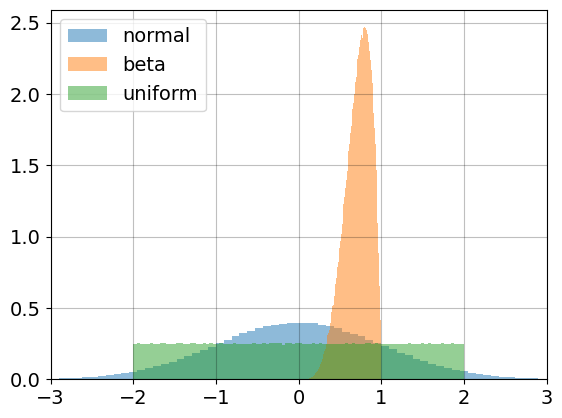

In [51]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.hist(X,bins=100,density=True,alpha=0.5,label='normal') # alpha < 1 = transparent
ax.hist(Y,bins=100,density=True,alpha=0.5,label='beta')
ax.hist(Z,bins=100,density=True,alpha=0.5,label='uniform')
#ax.hist(K,bins=100,density=True,alpha=0.5,label='choice')

ax.set_xlim([-3,3])
ax.legend(loc='upper left'); # note: the ; stops output from being printed
plt.show()

**Task:** Follow this [link](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html). Choose a distribution and add it to the figure above.

### 2.3. <a id='toc3_3_'></a>[Analytical results](#toc0_)

Sometimes, you want to compare a distribution of numbers to a **known** distribution.   
For instance, how close are our draws to a normal distribution?  
In this case, the `scipy.stats.norm` module comes in handy.  
It operates differently from numpy. It creates an **object** to generate numbers from rather than just making an array at once. 

F pdf at 0.0: 0.503
F cdf at 0.0: 0.369


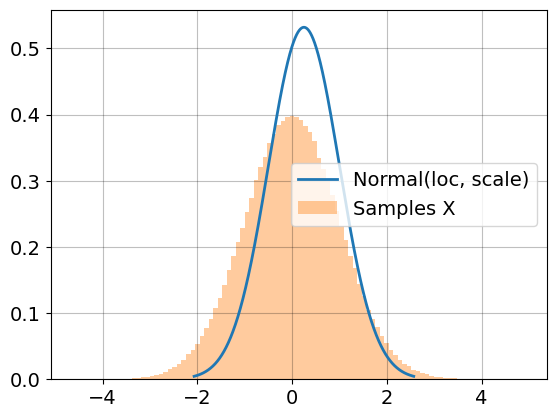

In [52]:
from scipy.stats import norm # we import the normal distribution from scipy.stats

# local RNG for reproducible draws
rng = np.random.default_rng(123)

# a) create analytical (frozen) Normal distribution
loc_guess, scale_guess = 0.25, 0.75
# loc_guess, scale_guess = 0.0, 1.0

F = norm(loc=loc_guess, scale=scale_guess)

# example: 50 random draws using the local RNG
rnd = F.rvs(size=50, random_state=rng)

# print pdf and cdf at 0.0
print(f"F pdf at 0.0: {F.pdf(0.0):.3f}\nF cdf at 0.0: {F.cdf(0.0):.3f}")

# b) vector of x values over central support (use percent point function)
x_low, x_high = F.ppf([0.001, 0.999])
x_support = np.linspace(x_low, x_high, 5000) # makes a fine grid between x_low and x_high
pdf_vals = F.pdf(x_support) # pdf values at each point in x_support

# c) compare empirical X (from before) with fitted/guessed Normal
fig, ax = plt.subplots(dpi=100)
ax.plot(x_support, pdf_vals, lw=2, label="Normal(loc, scale)")
ax.hist(X, bins=100, density=True, alpha=0.4, label="Samples X")
ax.legend()
plt.show()

**Task:** Make the pdf fit the histogram closely.

## 3. <a id='toc4_'></a>[Load and save variables](#toc0_)

### 3.1. <a id='toc4_1_'></a>[Pickle](#toc0_)

A good allround method for loading and saving is to use **pickle**. Here is how to save:

In [ ]:
# a. variables
my_dict = {'a': 1, 'b': 2}      # create a standard Python dictionary with two key–value pairs
my_vec = np.array([1, 2, 3])    # create a NumPy array (vector) with three integers
my_tuple = (1, 4, 2)           # create a Python tuple (immutable sequence)

# b. put them in a dictionary
my_data = {}                              # start an empty dictionary to collect all objects
my_data['my_dict'] = my_dict              # store the dict under the key 'my_dict'
my_data['my_vec'] = my_vec                # store the NumPy array under the key 'my_vec'
my_data['my_tuple'] = my_tuple          # store the tuple under the key 'my_tuple'

# c. save the dictionary in a file
# 'with' ensures the file is properly closed even if an error occurs inside the block
# open(..., 'wb') opens (or creates) a file named 'data.p' in write-binary mode (required by pickle)
with open('data.p', 'wb') as f:           # f gives a name to the object created by with statement.
    pickle.dump(my_data, f)               # serialize (pickle) the 'my_data' dictionary into the file

Delete the variables:

In [54]:
del my_dict
del my_vec
del my_tuple

Load the data again:

In [55]:
# a. try
try:
    print(my_tuple)
except:
    print('my_vec does not exist')
    
# b. load    
with open(f'data.p', 'rb') as f: # rb = read binary
    data = pickle.load(f)

# Unpack data
my_dict = data['my_dict']
my_vec = data['my_vec']
my_tuple = data['my_tuple']

# c. try again
print(my_vec)
print(my_tuple)

my_vec does not exist
[1 2 3]
(1, 4, 2)


### 3.2. <a id='toc4_2_'></a>[Saving with numpy](#toc0_)

When only saving/loading **numpy arrays**, an alternative is to use ``np.savez`` (or ``np.savez_compressed``). This is typically faster than pickle.

Here is how to save some data:

In [56]:
my_data = {}
my_data['A'] = np.array([1,2,3])
my_data['B'] = np.zeros((5,8))
my_data['C'] = np.ones((7,3,8))
np.savez(f'data.npz', **my_data)
# '**' unpacks the dictionary

Here is how to load the data again:

In [57]:
# a. delete
del my_data

# a. load all
my_data = {}
with np.load(f'data.npz') as data_obj:
    for key in data_obj.files:
        my_data[key] = data_obj[key]
print(my_data['A'])

# b. load single array
X = np.load(f'data.npz')['A']
print(X)

[1 2 3]
[1 2 3]


## 4. <a id='toc5_'></a>[Create a class to generate random numbers](#toc0_)

Advantages: Especially for larger projects, using a class is cleaner and adds more structure to your code.

In [58]:
class dice_cup:  # define a class named 'dice_cup'
    
    def __init__(self, ndice, rng=None):
        self.ndice = ndice
        self.rng = np.random.default_rng() if rng is None else rng
        self.dice = None

    def roll(self):
        self.dice = self.rng.integers(1, 7, size=self.ndice) # roll ndice dice (values 1 to 6)
        print(self.dice)

    def shuffle(self):
        self.rng.shuffle(self.dice)
        print(self.dice)
    
    def roll_and_sum(self):            # method placeholder: supposed to roll and return the total
        pass                           # 'pass' = do nothing (no roll, no sum, no print)
        
# --- usage example ---
my_dice_cup = dice_cup(4)   # create a dice_cup that holds 4 dice
my_dice_cup.roll()          # roll the 4 dice; prints something like [2 6 1 4]
my_dice_cup.shuffle()       # shuffle their order; prints a permuted array (e.g., [6 4 2 1])
my_dice_cup.roll_and_sum()  # currently does nothing because the method contains only 'pass'


[2 1 4 4]
[4 1 4 2]


**Task:** Add a method ``roll_and_sum()`` to the class above, which rolls and print the sum of the dice. <br>
*(You can delete the pass statement when starting to code. It's there to inform Python that roll_and_sum() is well defined as Python cannot handle a totally codeless function)*

In [59]:
## Answer

class dice_cup:  # define a class named 'dice_cup'
    
    def __init__(self, ndice, rng=None):
        self.ndice = ndice
        self.rng = np.random.default_rng() if rng is None else rng
        self.dice = None

    def roll(self):
        self.dice = self.rng.integers(1, 7, size=self.ndice)
        print(self.dice)

    def shuffle(self):
        self.rng.shuffle(self.dice)
        print(self.dice)
        
    def roll_and_sum(self):
        self.roll()                # roll the dice
        print(np.sum(self.dice))    # print the sum of the dice
        
my_dice_cup = dice_cup(4)
my_dice_cup.roll_and_sum()

[3 1 5 6]
15


## 5. <a id='toc6_'></a>[Applications](#toc0_)

### 5.1 <a id='toc6_1_'></a>[ AR(1) Income Process](#toc0_)


Model:
$$
y_t=\rho\,y_{t-1}+\varepsilon_t,\qquad \varepsilon_t\sim\mathcal N(0,\sigma^2),\; |\rho|<1
$$

Key properties (stationary case):
- $\mathbb E[y_t]=0$, 
- $\operatorname{Var}(y_t)=\sigma^2/(1-\rho^2)$,

**Why set a seed?** For reproducible, comparable, debuggable simulations.  
Use a local generator and pass it through: `rng = np.random.default_rng(123)`.


In [60]:

def sim_ar1(T=5000, rho=0.9, sigma=0.1, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    eps = rng.normal(0, sigma, size=T) # generate a time series of shocks (epsilon)
    y = np.empty(T); y[0] = 0.0 # initialize y
    for t in range(1, T):       # iterate from t=1 to T-1
        y[t] = rho*y[t-1] + eps[t] # update y according to AR(1) formula
    return y # returnS the simulated series

rng = np.random.default_rng(3) # Create a local RNG with seed 3
y = sim_ar1(T=1000, rho=0.95, sigma=0.1, rng=rng)   # apply the function to simulate an AR(1) series
print("Empirical mean, var:", y.mean(), y.var())
print("Theoretical var:", (0.1**2)/(1-0.95**2))


Empirical mean, var: 0.06926594866359553 0.09656799760202293
Theoretical var: 0.10256410256410255


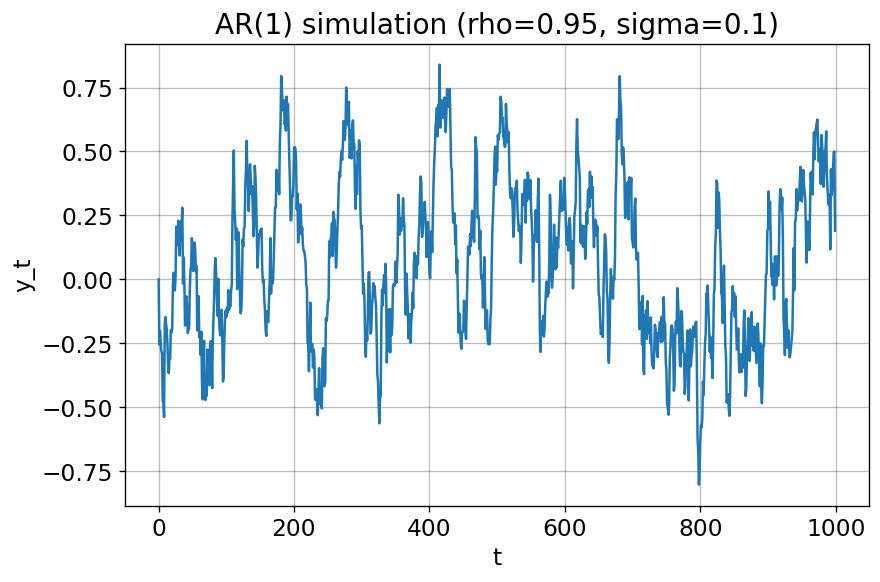

In [61]:
# Time-series plot
fig = plt.figure(figsize=(8,5), dpi=120)
plt.plot(y)
plt.title("AR(1) simulation (rho=0.95, sigma=0.1)")
plt.xlabel("t")
plt.ylabel("y_t")
plt.show()


seed=3 run equals seed=3 repeat: True


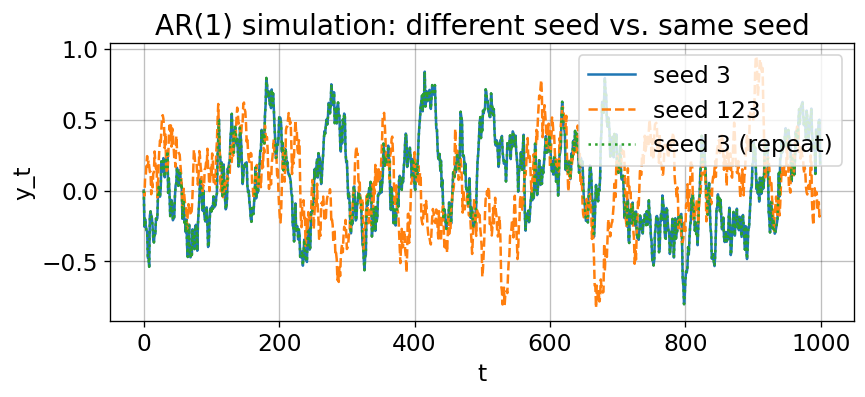

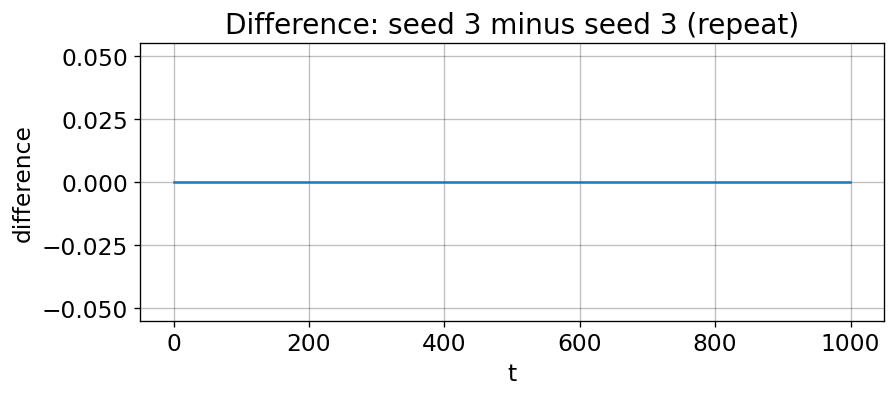

In [62]:
# --- simulate with three seeds: 3, 123, and 3 again ---
T, rho, sigma = 1000, 0.95, 0.1

rng = np.random.default_rng(3)
y_seed3 = sim_ar1(T=T, rho=rho, sigma=sigma, rng=rng)

rng = np.random.default_rng(123)
y_seed123 = sim_ar1(T=T, rho=rho, sigma=sigma, rng=rng)

rng = np.random.default_rng(3)
y_seed3_repeat = sim_ar1(T=T, rho=rho, sigma=sigma, rng=rng)

# Verify overlay: same seed => identical path
print("seed=3 run equals seed=3 repeat:", np.allclose(y_seed3, y_seed3_repeat))

# --- overlay plot ---
fig = plt.figure(figsize=(8,3), dpi=120)
plt.plot(y_seed3, label="seed 3")
plt.plot(y_seed123, label="seed 123", linestyle="--")
plt.plot(y_seed3_repeat, label="seed 3 (repeat)", linestyle=":")
plt.title("AR(1) simulation: different seed vs. same seed")
plt.xlabel("t"); plt.ylabel("y_t")
plt.legend()
plt.show()

# Show the difference is zero everywhere
fig = plt.figure(figsize=(8,3), dpi=120)
plt.plot(y_seed3 - y_seed3_repeat)
plt.title("Difference: seed 3 minus seed 3 (repeat)")
plt.xlabel("t"); plt.ylabel("difference")
plt.show()


### 5.2. <a id='toc6_2_'></a>[Monte Carlo as Numerical Expectation](#toc0_)

**Goal.** Compute $\theta = \mathbb{E}[g(X)]$ when the integral is hard.

**Note:**
- $F_X$: the **distribution of $X$** from which we draw samples (e.g., Normal, Uniform).  
  Formally, $X \sim F$ means $X$ is a random variable with distribution $F$.
- $g(x)$: a **function applied to each draw** (the quantity you want the expectation of).  
  Examples: $g(x)=x$ (mean), $g(x)=u(x)$ (utility).

**Estimator (for a single run).** Draw $X_1,\dots,X_N \overset{\text{i.i.d.}}{\sim} F$ and compute
$$
\hat{\theta} \;=\; \frac{1}{N}\sum_{i=1}^N g(X_i).
$$
By the Law of Large Numbers, $\hat{\theta} \to \theta$ as $N \to \infty$.

**Monte Carlo error (single run).**
Let
$$
\bar g \;=\; \frac{1}{N}\sum_{i=1}^N g(X_i), 
\qquad \text{we can compute the sample variance:} \qquad
S_g^2 \;=\; \frac{1}{N-1}\sum_{i=1}^N \big(g(X_i) - \bar g\big)^2.
$$
A standard error estimate is
$$
\mathrm{SE}(\hat{\theta}) \;\approx\; \frac{S_g}{\sqrt{N}}.
$$

### What does $N$ do?
- **$N$ (draws per run).** Larger $N \Rightarrow$ smaller error, roughly $\propto 1/\sqrt{N}$.
- **$R$ (independent replications).** Repeat the whole procedure $R$ times to **measure** variability across runs.  
  If $\hat{\theta}^{(1)},\dots,\hat{\theta}^{(R)}$ are the $R$ estimates, then $\widehat{\mathrm{SE}}(\hat{\theta})$ is the sample SD of $\{\hat{\theta}^{(r)}\}_{r=1}^R$.  
  $R$ does **not** change any single $\hat{\theta}$; it improves the precision of the **SE estimate**.

### Algorithm (one run)
1. Draw $X_1,\dots,X_N \sim F$ i.i.d.
2. Compute $\hat{\theta}=\frac{1}{N}\sum_{i=1}^N g(X_i)$.
3. Report $\mathrm{SE}(\hat{\theta})\approx S_g/\sqrt{N}$ (or, with $R$ runs, use the SD across $\{\hat{\theta}^{(r)}\}$).


In [63]:
# Monte Carlo estimate of E[X] for X ~ Normal(mu, sigma^2), with a 95% confidence interval
rng   = np.random.default_rng(1)  # create RNG; seeding (1) makes results reproducible
mu    = 2.0                       # true mean of the Normal distribution
sigma = 3.0                       # true standard deviation 
N     = 1000                      # number of simulated draws -> vary the number of draws to see how the CI shrinks

# Draw N i.i.d. samples from N(mu, sigma^2)
x = rng.normal(loc=mu, scale=sigma, size=N)

# Monte Carlo estimator: sample mean approximates E[X]
theta_hat = x.mean()

# Standard error of the sample mean when population sigma is known: sigma/ sqrt(N)
se = sigma / np.sqrt(N)

# 95% confidence interval using Normal critical value z_{0.975} ≈ 1.96
ci = (theta_hat - 1.96 * se,     # lower bound
      theta_hat + 1.96 * se)     # upper bound

# Print output
print(f"MC estimate of E[X]: {theta_hat:.3f}  (true μ = {mu})")
print(f"SE ≈ {se:.3f},  95% CI: [{ci[0]:.3f}, {ci[1]:.3f}]")



MC estimate of E[X]: 1.837  (true μ = 2.0)
SE ≈ 0.095,  95% CI: [1.651, 2.023]


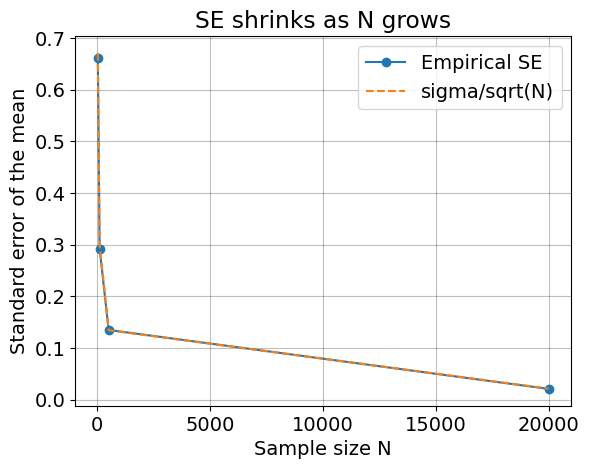

In [64]:
# 1) Line plot: SE vs N (with sigma/ sqrt(N) overlay)

import numpy as np
import matplotlib.pyplot as plt

rng   = np.random.default_rng(2)
mu, sigma = 2.0, 3.0
Ns = np.array([20, 100, 500, 20_000])
R  = 1000

empirical_se = []
for N in Ns:
    means = rng.normal(mu, sigma, size=(R, N)).mean(axis=1)  # R sample means
    empirical_se.append(np.std(means, ddof=1))               # SD of means = SE

empirical_se = np.array(empirical_se)
theoretical_se = sigma / np.sqrt(Ns)

plt.figure()
plt.plot(Ns, empirical_se, marker="o", label="Empirical SE")
plt.plot(Ns, theoretical_se, linestyle="--", label="sigma/sqrt(N)")
plt.xlabel("Sample size N")
plt.ylabel("Standard error of the mean")
plt.title("SE shrinks as N grows")
plt.legend()
plt.show()


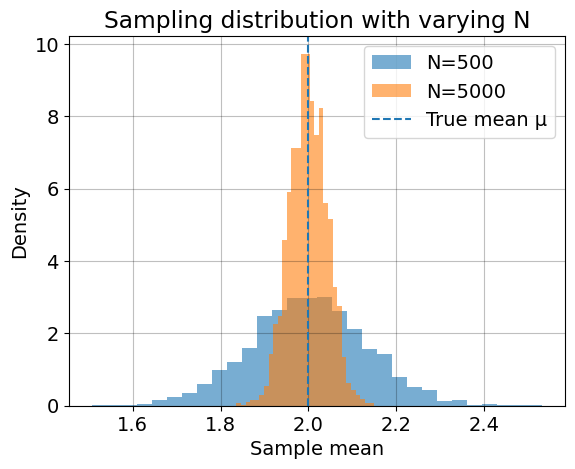

In [65]:
# 2) Histogram comparison: small N vs large N (distribution gets tighter)
rng   = np.random.default_rng(3)
mu, sigma = 2.0, 3.0
R = 3000
N_small, N_large = 500, 5000

means_small = rng.normal(mu, sigma, size=(R, N_small)).mean(axis=1)
means_large = rng.normal(mu, sigma, size=(R, N_large)).mean(axis=1)

plt.figure()
plt.hist(means_small, bins=30, density=True, alpha=0.6, label=f"N={N_small}")
plt.hist(means_large, bins=30, density=True, alpha=0.6, label=f"N={N_large}")
plt.axvline(mu, linestyle="--", label="True mean μ")
plt.xlabel("Sample mean")
plt.ylabel("Density")
plt.title("Sampling distribution with varying N")
plt.legend()
plt.show()


***What does $R$ do?***

- Think of $R$ as **rerunning the same experiment** $R$ times with fresh random draws each time.  
- Each run gives one estimate $\hat{\theta}$. After $R$ runs you have $\hat{\theta}^{(1)},\ldots,\hat{\theta}^{(R)}$, so you can **see how much the answers wiggle** across runs.
- The **spread** of these $R$ numbers (their sample standard deviation) is your **measured Monte Carlo uncertainty**.
- **Key difference:** Increasing $N$ (more draws per run) **reduces** the noise of a single estimate; increasing $R$ **measures** that noise more reliably.  
  In short: **$N$ reduces noise, $R$ measures noise.**

**This lecture:** We have talked about:

1. **`numpy.random` (modern Generator)**
   - Use `np.random.default_rng(seed)` for local, reproducible randomness.
   - Draw from common distributions (e.g., `rng.normal`, `rng.integers`) in vectorized form.

2. **`scipy.stats` distributions**
   - Useful for exact probabilities and validating simulations.

3. **Saving & loading data**
   - `pickle` for arbitrary Python objects (dicts, classes).
   - `np.savez` / `np.load` fast, portable storage.

4. **Creating classes**
   - Encapsulate parameters and a **RNG** for clean structures, testability, and reproducibility.
   - Example: `dice_cup`.

5. **Applications with seeds and random numbers**
   - **AR(1) process:** simulate/forecast with a fixed seed for reproducible results.
   - **Monte Carlo:** estimate expectations and 95% CIs; see how standard errors change with increasing sample size.
